## 가설 3
- 가설 : 실패한 게임은 가격이 리뷰에 영향을 미칠 것이다.
    - 실패한 게임의 정의
        - 긍정 리뷰 비율이 0.5 미만인 데이터
        - 리뷰의 수가 100개 이상인 데이터
    
### 데이터 이상치 정의
- playtime의 범위는 30분 이상, 1000분 이하로 잡는다. 이 외에는 이상치로 정의

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [2]:
# 이상치 설정
def average_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['average_playtime'] >= min_data
    cond2 = data['average_playtime'] <= max_data
    
    data = data[cond1 & cond2]
    
    return data

def median_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['median_playtime'] >= min_data
    cond2 = data['median_playtime'] <= max_data

    data = data[cond1 & cond2]

    return data

In [7]:
def success_game_range(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] >= rating_ratio
    cond2 = data['total_ratings'] >= count_reviews
    
    data = data[cond1 & cond2]
    
    return data

def mixed_game_range(data, min_ratio, max_ratio, count_reveiws):
    cond1 = data['positive_rating_ratio'] >= min_ratio
    cond2 = data['positive_rating_ratio'] < max_ratio    
    cond3 = data['total_ratings'] >= count_reveiws
    
    data = data[cond1 & cond2 & cond3]
    
    return data

def fail_game_range(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] < rating_ratio
    cond2 = data['total_ratings'] >= count_reviews
    
    data = data[cond1 & cond2]
    
    return data

In [4]:
# t-test 자동화
# 하나의 데이터로 다른 칼럼 t-test
def do_ttest1(data, col1, col2, alternative):
    result_ttest = ttest_ind(data[col1], data[col2], equal_var=False, alternative=alternative)

    return result_ttest
def do_ttest2(data1, data2, col, alternative):
    result_ttest = ttest_ind(data1[col], data2[col], equal_var=False, alternative=alternative)
    
    return result_ttest

In [5]:
df = pd.read_csv('5 Tags in steamspy.csv')
df

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1020340,Audica,2019-03-07,1,True,False,False,"Harmonix Music Systems, Inc","Harmonix Music Systems, Inc",0,...,0.795181,17,17,0-20000,15.49,rhythm,music,vr,early_access,action
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime
6168,1043180,Lovers of Aether,2019-04-01,1,True,True,False,Dan Fornace,Dan Fornace,0,...,0.957353,12,12,50000-100000,0.00,psychological_horror,dating_sim,casual,indie,free_to_play


In [45]:
owners_split = df['owners'].str.split('-', expand=True).astype(int)

# 최소값과 최대값의 평균을 중간값으로 계산
df['owners_mid'] = (owners_split[0] + owners_split[1]) // 2

# 결과 확인
df[['owners', 'owners_mid']].head()

,owners,owners_mid
0,10000000-20000000,15000000
1,5000000-10000000,7500000
2,5000000-10000000,7500000
3,5000000-10000000,7500000
4,5000000-10000000,7500000


In [46]:
data = average_playtime_setting_outlier(df, 30, 1000)
data = median_playtime_setting_outlier(data, 30, 1000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter,7500000
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter,7500000
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter,7500000
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic,7500000
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer,15000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime,35000
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person,10000
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve,35000
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime,10000


In [47]:
success_game_data = success_game_range(data, 0.7, 500)
fail_game_data = fail_game_range(data, 0.5, 100)
mixed_game_data = mixed_game_range(data, 0.4, 0.7, 100)

display(success_game_data, fail_game_data, mixed_game_data)

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter,7500000
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter,7500000
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter,7500000
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic,7500000
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer,15000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack,150000
6154,992300,Ã¥ÂÂÃ¨Â¡ÂÃ¥ÂÂ° Bloody Spell,2019-01-15,1,True,False,False,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,0,...,36,36,50000-100000,15.49,action,indie,early_access,rpg,violent,75000
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action,150000
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime,35000


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
132,7530,Two Worlds II Castle Defense,2011-06-14,1,True,True,False,Reality Pump Studios,Topware Interactive,0,...,320,330,200000-500000,6.99,strategy,tower_defense,fantasy,puzzle_platformer,real_time_tactics,350000
180,10220,Postal III,2012-02-17,1,True,False,False,Trashmasters,Akella,18,...,411,411,50000-100000,8.99,action,dark_humor,gore,open_world,funny,75000
193,11590,Hospital Tycoon,2009-02-13,1,True,False,False,Deep Red Limited,Codemasters,0,...,119,176,200000-500000,3.49,simulation,management,singleplayer,1980s,puzzle_platformer,350000
275,18400,Crazy Machines 2,2008-06-20,1,True,False,False,Fakt Software,Viva Media,0,...,66,66,100000-200000,7.19,casual,strategy,puzzle,physics,singleplayer,150000
361,27330,Blacklight: Tango Down,2010-07-14,1,True,False,False,Zombie Studios,Ignition Entertainment,0,...,129,193,50000-100000,0.79,action,fps,multiplayer,1980s,quick_time_events,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6081,876330,Revelation Online,2018-08-07,1,True,False,False,Netease Games,My.com,0,...,686,686,100000-200000,0.00,free_to_play,rpg,mmorpg,massively_multiplayer,1980s,150000
6112,911400,Assassin's CreedÃÂ® III Remastered,2019-03-29,1,True,False,False,Ubisoft Entertainment,Ubisoft Entertainment\t\t\t\t,0,...,80,80,50000-100000,33.99,action,adventure,assassin,open_world,1980s,75000
6116,921060,Modern Combat 5,2018-10-24,1,True,False,False,Gameloft,Gameloft,0,...,129,69,200000-500000,0.00,free_to_play,massively_multiplayer,fps,action,shooter,350000
6117,921590,DISSIDIA FINAL FANTASY NT Free Edition,2019-03-12,1,True,False,False,"Square Enix;KOEI TECMO GAMES CO., LTD.",Square Enix,0,...,285,289,200000-500000,0.00,free_to_play,action,multiplayer,fighting,anime,350000


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based,75000
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer,1500000
87,4520,Full Spectrum Warrior,2007-07-17,1,True,False,False,Pandemic Studios,THQ Nordic,0,...,124,244,100000-200000,7.99,strategy,action,military,tactical,singleplayer,150000
98,4890,Cossacks II: Battle for Europe,2011-08-26,1,True,False,False,GSC Game World,GSC World Publishing,0,...,71,71,100000-200000,3.99,strategy,rts,historical,puzzle,racing,150000
115,6550,Devil May CryÃÂ® 3 Special Edition,2007-06-12,1,True,False,False,"CAPCOM Co., Ltd.",Capcom,0,...,90,90,200000-500000,15.99,action,hack_and_slash,great_soundtrack,stylized,spectacle_fighter,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,915580,Dungeon Hunter Champions,2018-12-19,1,True,False,False,Gameloft,Gameloft,0,...,375,375,50000-100000,0.00,free_to_play,rpg,action,moba,multiplayer,75000
6116,921060,Modern Combat 5,2018-10-24,1,True,False,False,Gameloft,Gameloft,0,...,129,69,200000-500000,0.00,free_to_play,massively_multiplayer,fps,action,shooter,350000
6118,921630,Ã©ÂÂ³Ã§ÂÂµ INVAXION,2018-12-19,1,True,False,False,Nanjing AQUATRAX,bilibili,0,...,760,760,100000-200000,11.29,music,rhythm,indie,casual,anime,150000
6141,964470,Shakes and Fidget Remastered,2018-11-22,1,True,False,False,Playa Games GmbH,Playa Games GmbH,0,...,50,91,50000-100000,0.00,free_to_play,casual,rpg,strategy,indie,75000


In [48]:
display(success_game_data.corr(), fail_game_data.corr(), mixed_game_data.corr())

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price,owners_mid
appid,1.000000,-0.139154,NaN,-0.011626,-0.064963,-0.061905,0.131643,-0.105232,-0.076181,-0.105137,-0.001771,-0.059128,-0.004737,0.054545,-0.284031
english,-0.139154,1.000000,NaN,0.051057,0.046267,0.023879,-0.000251,0.019096,0.023004,0.020058,-0.003150,-0.032524,-0.042052,0.004459,0.029037
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.011626,0.051057,NaN,1.000000,0.683081,-0.145853,-0.039772,0.076502,-0.019849,0.068408,0.127194,0.004302,-0.001356,-0.101449,0.063919
environ_Linux,-0.064963,0.046267,NaN,0.683081,1.000000,-0.120879,-0.037586,0.079912,-0.006879,0.072935,0.109163,0.015758,0.010242,-0.039236,0.074283
required_age,-0.061905,0.023879,NaN,-0.145853,-0.120879,1.000000,-0.010345,0.187668,0.169445,0.191079,-0.011171,0.136755,0.104712,0.205850,0.099770
achievements,0.131643,-0.000251,NaN,-0.039772,-0.037586,-0.010345,1.000000,-0.002241,-0.001963,-0.002275,0.038426,-0.029169,-0.023176,-0.042747,-0.016777
positive_ratings,-0.105232,0.019096,NaN,0.076502,0.079912,0.187668,-0.002241,1.000000,0.705646,0.997140,0.205401,0.302272,0.068208,0.088041,0.605074
negative_ratings,-0.076181,0.023004,NaN,-0.019849,-0.006879,0.169445,-0.001963,0.705646,1.000000,0.757179,-0.162297,0.317033,0.070238,0.119830,0.538070
total_ratings,-0.105137,0.020058,NaN,0.068408,0.072935,0.191079,-0.002275,0.997140,0.757179,1.000000,0.172043,0.312472,0.070371,0.093944,0.615193


,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price,owners_mid
appid,1.000000,-0.034327,NaN,-0.127446,-0.064222,-0.092866,0.126820,-0.010685,-0.037875,-0.025294,0.103055,0.057773,0.004254,-0.220182,0.072287
english,-0.034327,1.000000,NaN,0.038004,0.032147,0.018754,0.010659,0.016000,0.021940,0.019286,-0.068908,0.079458,0.080783,0.046357,0.030047
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.127446,0.038004,NaN,1.000000,0.740754,-0.052022,-0.017709,0.043370,0.039764,0.041743,0.067126,0.077386,0.088444,0.157029,-0.072521
environ_Linux,-0.064222,0.032147,NaN,0.740754,1.000000,-0.101281,-0.005206,-0.028946,-0.017348,-0.022946,-0.017834,0.065662,0.081787,0.065026,-0.086639
required_age,-0.092866,0.018754,NaN,-0.052022,-0.101281,1.000000,-0.009649,0.194657,0.201828,0.199837,0.030480,0.022840,0.032079,0.268876,0.118634
achievements,0.126820,0.010659,NaN,-0.017709,-0.005206,-0.009649,1.000000,-0.012862,-0.019682,-0.016597,-0.009018,0.120615,0.019769,-0.029682,0.007285
positive_ratings,-0.010685,0.016000,NaN,0.043370,-0.028946,0.194657,-0.012862,1.000000,0.972513,0.992222,0.153793,0.161923,0.046983,0.256926,0.710875
negative_ratings,-0.037875,0.021940,NaN,0.039764,-0.017348,0.201828,-0.019682,0.972513,1.000000,0.993934,0.045126,0.137193,0.044682,0.260532,0.680749
total_ratings,-0.025294,0.019286,NaN,0.041743,-0.022946,0.199837,-0.016597,0.992222,0.993934,1.000000,0.096765,0.149823,0.046078,0.260631,0.699687


,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price,owners_mid
appid,1.000000,-0.107697,NaN,-0.110715,-0.083211,-0.056060,0.060512,-0.067830,-0.052739,-0.062611,-0.132861,0.087748,0.087005,-0.111753,-0.097168
english,-0.107697,1.000000,NaN,0.011460,0.036232,0.015667,0.007736,0.020745,0.019088,0.020336,0.053027,0.044186,0.045797,0.028553,0.025243
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.110715,0.011460,NaN,1.000000,0.691361,-0.055385,0.004234,-0.037173,-0.048341,-0.042110,0.124761,-0.017030,0.001118,0.003022,-0.048050
environ_Linux,-0.083211,0.036232,NaN,0.691361,1.000000,-0.062371,0.019966,-0.057578,-0.070367,-0.063416,0.106294,0.029438,0.044792,0.014342,-0.074295
required_age,-0.056060,0.015667,NaN,-0.055385,-0.062371,1.000000,-0.007629,0.236585,0.225167,0.234914,0.018188,0.032415,0.018372,0.241122,0.180023
achievements,0.060512,0.007736,NaN,0.004234,0.019966,-0.007629,1.000000,0.008846,0.007792,0.008532,0.016134,-0.010947,-0.010324,-0.010342,0.004117
positive_ratings,-0.067830,0.020745,NaN,-0.037173,-0.057578,0.236585,0.008846,1.000000,0.949534,0.992055,0.126601,0.329581,0.119691,0.237595,0.707259
negative_ratings,-0.052739,0.019088,NaN,-0.048341,-0.070367,0.225167,0.007792,0.949534,1.000000,0.981449,0.016204,0.288201,0.111504,0.242105,0.652322
total_ratings,-0.062611,0.020336,NaN,-0.042110,-0.063416,0.234914,0.008532,0.992055,0.981449,1.000000,0.083881,0.317037,0.117879,0.242326,0.693922


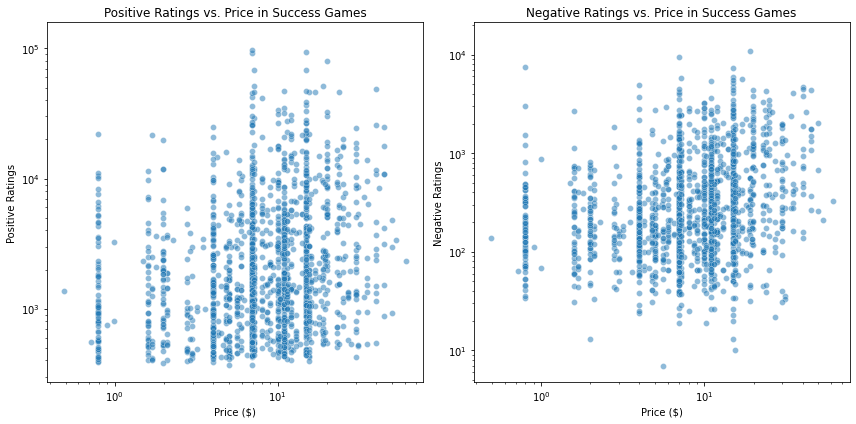

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=success_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Success Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=success_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Success Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

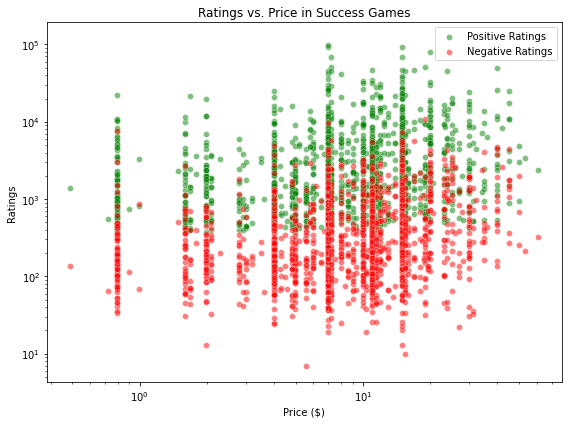

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=success_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=success_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Success Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

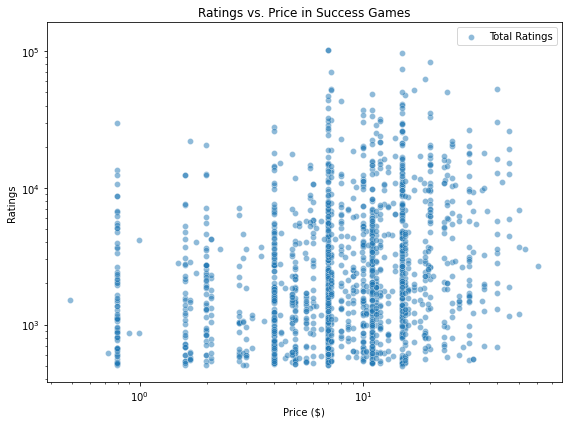

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='total_ratings', data=success_game_data, alpha=0.5, ax=ax, label="Total Ratings")

ax.set_title('Ratings vs. Price in Success Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

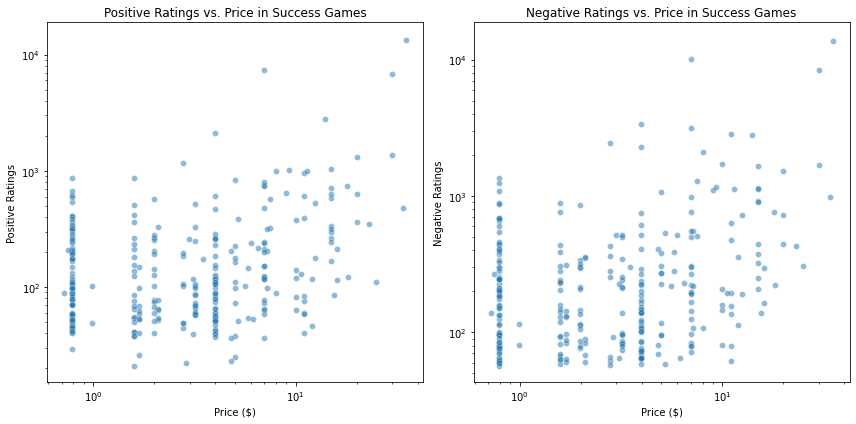

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=fail_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Success Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=fail_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Success Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

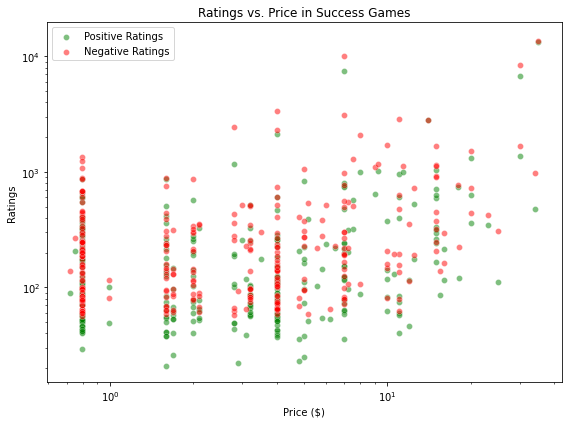

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Success Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

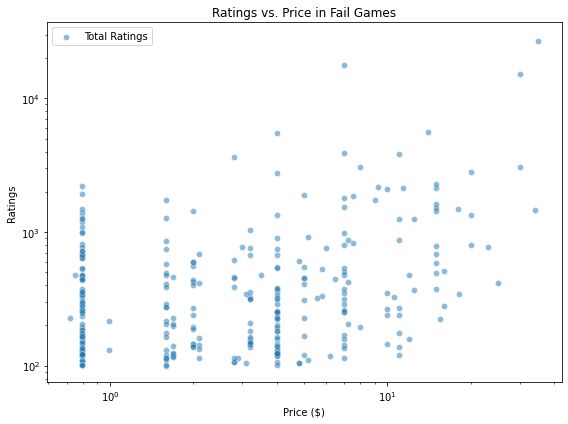

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='total_ratings', data=fail_game_data, alpha=0.5, ax=ax, label="Total Ratings")

ax.set_title('Ratings vs. Price in Fail Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

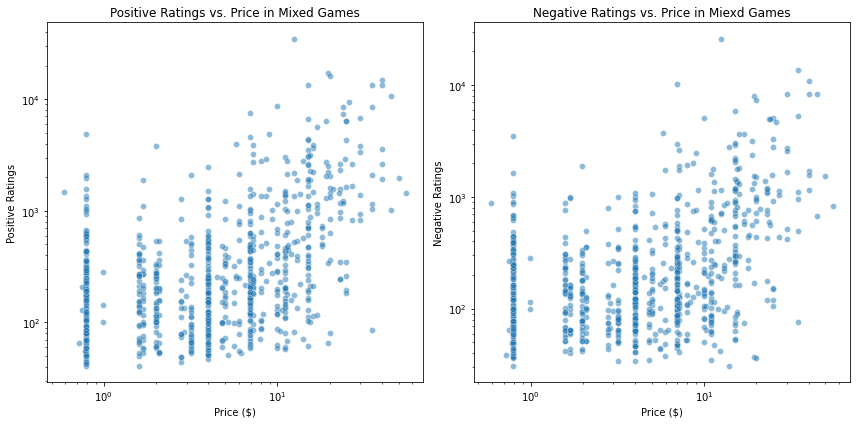

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Mixed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Miexd Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

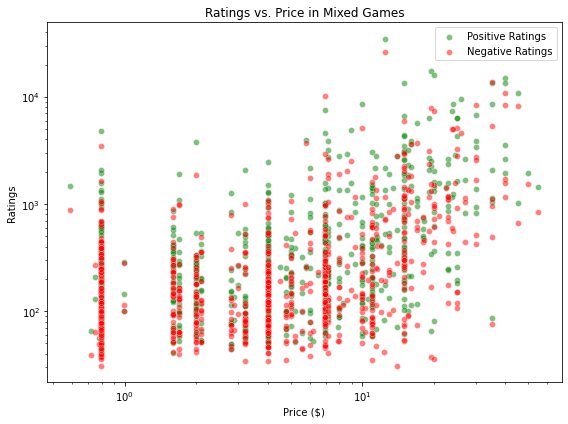

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="green", label="Positive Ratings")
sns.scatterplot(x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Negative Ratings")

ax.set_title('Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

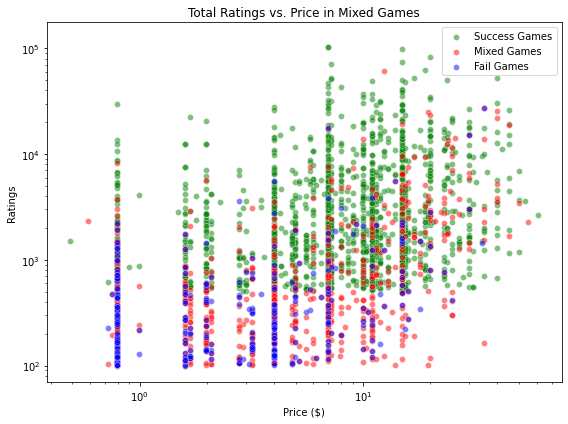

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='total_ratings', data=success_game_data, alpha=0.5, ax=ax, color="green", label="Success Games")
sns.scatterplot(x='price', y='total_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Mixed Games")
sns.scatterplot(x='price', y='total_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="blue", label="Fail Games")

ax.set_title('Total Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

### 파생되는 생각
- 과연 복합적 게임(mixed_game_data)는 가격때문에 긍정 리뷰가 적은 것일까?

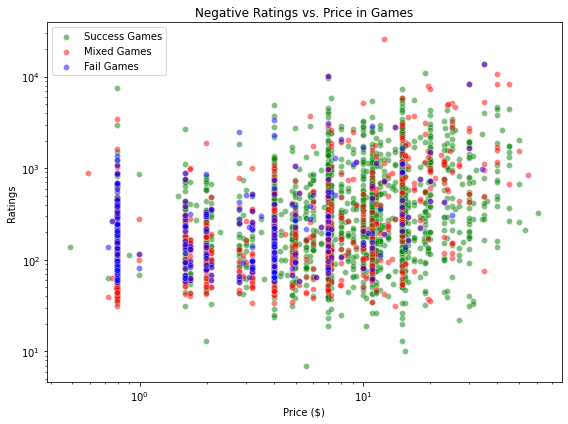

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='negative_ratings', data=success_game_data, alpha=0.5, ax=ax, color="green", label="Success Games")
sns.scatterplot(x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Mixed Games")
sns.scatterplot(x='price', y='negative_ratings', data=fail_game_data, alpha=0.5, ax=ax, color="blue", label="Fail Games")

ax.set_title('Negative Ratings vs. Price in Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

## 가설 4
- 가설 : 복합적 평가를 받는 게임은 가격이 리뷰에 영향을 미칠 것이다.
    - 복합적 평가를 받는 게임의 정의
        - 긍정 리뷰 비율이 0.4 이상, 0.7 미만의 데이터
        - 리뷰의 수가 100개 이상인 데이터
    
### 데이터 이상치 정의
- playtime의 범위는 30분 이상, 1000분 이하로 잡는다. 이 외에는 이상치로 정의

In [59]:
mixed_game_data = mixed_game_range(data, 0.4, 0.7, 100)
mixed_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based,75000
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer,1500000
87,4520,Full Spectrum Warrior,2007-07-17,1,True,False,False,Pandemic Studios,THQ Nordic,0,...,124,244,100000-200000,7.99,strategy,action,military,tactical,singleplayer,150000
98,4890,Cossacks II: Battle for Europe,2011-08-26,1,True,False,False,GSC Game World,GSC World Publishing,0,...,71,71,100000-200000,3.99,strategy,rts,historical,puzzle,racing,150000
115,6550,Devil May CryÃÂ® 3 Special Edition,2007-06-12,1,True,False,False,"CAPCOM Co., Ltd.",Capcom,0,...,90,90,200000-500000,15.99,action,hack_and_slash,great_soundtrack,stylized,spectacle_fighter,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,915580,Dungeon Hunter Champions,2018-12-19,1,True,False,False,Gameloft,Gameloft,0,...,375,375,50000-100000,0.00,free_to_play,rpg,action,moba,multiplayer,75000
6116,921060,Modern Combat 5,2018-10-24,1,True,False,False,Gameloft,Gameloft,0,...,129,69,200000-500000,0.00,free_to_play,massively_multiplayer,fps,action,shooter,350000
6118,921630,Ã©ÂÂ³Ã§ÂÂµ INVAXION,2018-12-19,1,True,False,False,Nanjing AQUATRAX,bilibili,0,...,760,760,100000-200000,11.29,music,rhythm,indie,casual,anime,150000
6141,964470,Shakes and Fidget Remastered,2018-11-22,1,True,False,False,Playa Games GmbH,Playa Games GmbH,0,...,50,91,50000-100000,0.00,free_to_play,casual,rpg,strategy,indie,75000


In [60]:
mixed_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price,owners_mid
appid,1.000000,-0.107697,NaN,-0.110715,-0.083211,-0.056060,0.060512,-0.067830,-0.052739,-0.062611,-0.132861,0.087748,0.087005,-0.111753,-0.097168
english,-0.107697,1.000000,NaN,0.011460,0.036232,0.015667,0.007736,0.020745,0.019088,0.020336,0.053027,0.044186,0.045797,0.028553,0.025243
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.110715,0.011460,NaN,1.000000,0.691361,-0.055385,0.004234,-0.037173,-0.048341,-0.042110,0.124761,-0.017030,0.001118,0.003022,-0.048050
environ_Linux,-0.083211,0.036232,NaN,0.691361,1.000000,-0.062371,0.019966,-0.057578,-0.070367,-0.063416,0.106294,0.029438,0.044792,0.014342,-0.074295
required_age,-0.056060,0.015667,NaN,-0.055385,-0.062371,1.000000,-0.007629,0.236585,0.225167,0.234914,0.018188,0.032415,0.018372,0.241122,0.180023
achievements,0.060512,0.007736,NaN,0.004234,0.019966,-0.007629,1.000000,0.008846,0.007792,0.008532,0.016134,-0.010947,-0.010324,-0.010342,0.004117
positive_ratings,-0.067830,0.020745,NaN,-0.037173,-0.057578,0.236585,0.008846,1.000000,0.949534,0.992055,0.126601,0.329581,0.119691,0.237595,0.707259
negative_ratings,-0.052739,0.019088,NaN,-0.048341,-0.070367,0.225167,0.007792,0.949534,1.000000,0.981449,0.016204,0.288201,0.111504,0.242105,0.652322
total_ratings,-0.062611,0.020336,NaN,-0.042110,-0.063416,0.234914,0.008532,0.992055,0.981449,1.000000,0.083881,0.317037,0.117879,0.242326,0.693922


### .corr() 결과
- 진짜 복합적인(Mixed) 평가를 받는 게임인지 가격에 대해 상관계수를 갖는 것들이 은근히 있었다.
    - 리뷰의 개수(긍정, 부정, 총합)에 따라 가격이 증가한다??
    - 가격이 증가하면 리뷰의 개수(긍정, 부정, 총합)가 증가한다??

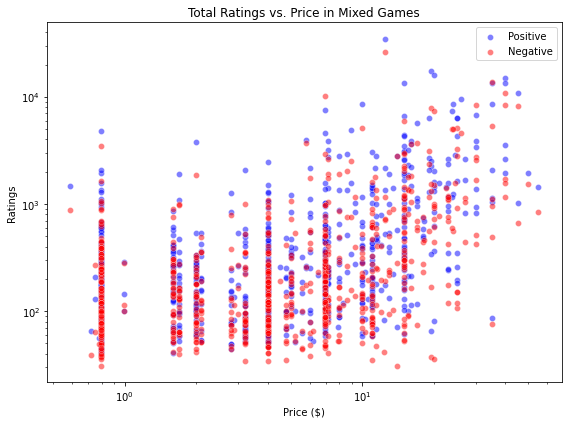

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="blue", label="Positive")
sns.scatterplot(x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="red", label="Negative")
# sns.scatterplot(x='price', y='total_ratings', data=mixed_game_data, alpha=0.5, ax=ax, color="blue", label="Total")

ax.set_title('Total Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

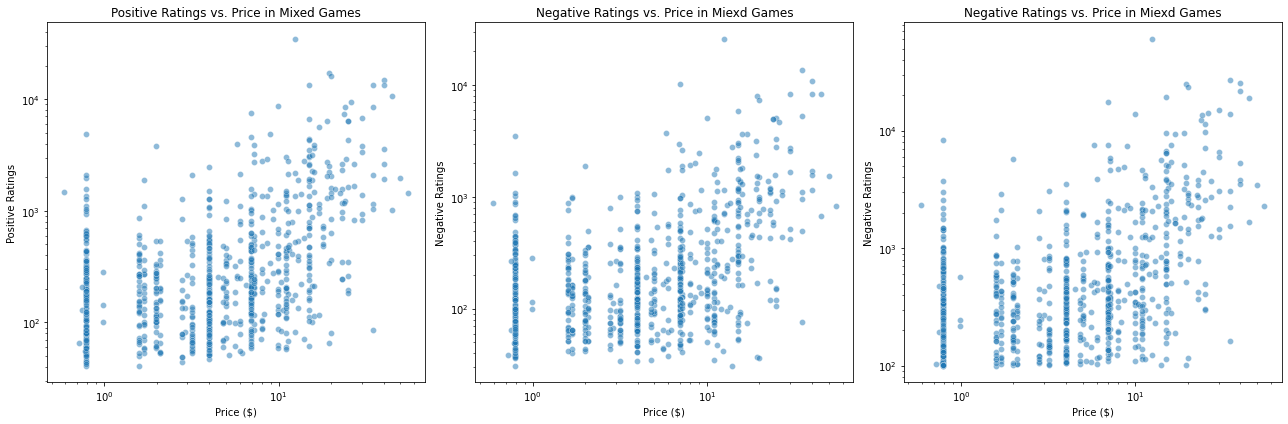

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=mixed_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in Mixed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=mixed_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in Miexd Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# 전체 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[2], x='price', y='total_ratings', data=mixed_game_data, alpha=0.5)
axes[2].set_title('Negative Ratings vs. Price in Miexd Games')
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Negative Ratings')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
plt.tight_layout()
plt.show()

In [63]:
nonzero_mixed_game_data = mixed_game_data[mixed_game_data['price'] != 0]
nonzero_mixed_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5,owners_mid
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based,75000
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer,1500000
87,4520,Full Spectrum Warrior,2007-07-17,1,True,False,False,Pandemic Studios,THQ Nordic,0,...,124,244,100000-200000,7.99,strategy,action,military,tactical,singleplayer,150000
98,4890,Cossacks II: Battle for Europe,2011-08-26,1,True,False,False,GSC Game World,GSC World Publishing,0,...,71,71,100000-200000,3.99,strategy,rts,historical,puzzle,racing,150000
115,6550,Devil May CryÃÂ® 3 Special Edition,2007-06-12,1,True,False,False,"CAPCOM Co., Ltd.",Capcom,0,...,90,90,200000-500000,15.99,action,hack_and_slash,great_soundtrack,stylized,spectacle_fighter,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,850910,Streamers Company Tycoon Ã¤Â¸Â»Ã¦ÂÂ­Ã§Â»ÂÃ§Â...,2019-03-13,0,True,True,False,Ã§ÂÂ³Ã¥Â¤Â´Ã¦Â¸Â¸Ã¦ÂÂ,Ã§ÂÂ³Ã¥Â¤Â´Ã¦Â¸Â¸Ã¦ÂÂ,0,...,347,347,20000-50000,7.19,simulation,casual,management,strategy,resource_management,35000
6098,892650,Play With Kizami,2018-08-09,0,True,False,False,Kizami Fans Club,Banana Spilt,0,...,30,30,0-20000,2.09,sexual_content,nudity,fps,mature,rpg,10000
6109,907270,eSports Legend / Ã§ÂÂµÃ§Â«ÂÃ¤Â¼Â Ã¥Â¥Â,2018-10-15,1,True,False,False,90Games,Coconut Island Games,0,...,88,88,100000-200000,7.19,indie,strategy,simulation,casual,management,150000
6118,921630,Ã©ÂÂ³Ã§ÂÂµ INVAXION,2018-12-19,1,True,False,False,Nanjing AQUATRAX,bilibili,0,...,760,760,100000-200000,11.29,music,rhythm,indie,casual,anime,150000


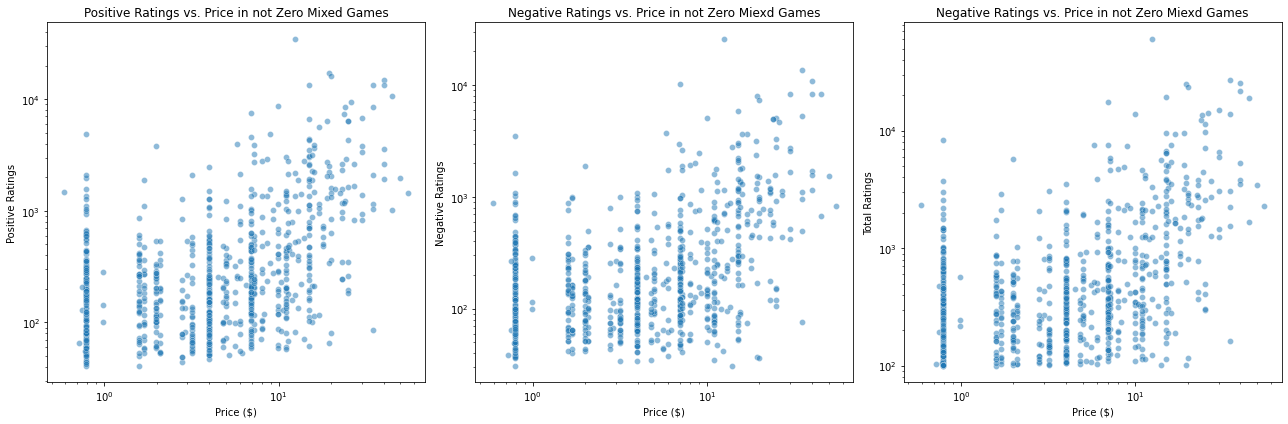

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 긍정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[0], x='price', y='positive_ratings', data=nonzero_mixed_game_data, alpha=0.5)
axes[0].set_title('Positive Ratings vs. Price in not Zero Mixed Games')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Positive Ratings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# 부정 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[1], x='price', y='negative_ratings', data=nonzero_mixed_game_data, alpha=0.5)
axes[1].set_title('Negative Ratings vs. Price in not Zero Miexd Games')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Negative Ratings')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

# 전체 리뷰와 가격의 관계 시각화
sns.scatterplot(ax=axes[2], x='price', y='total_ratings', data=nonzero_mixed_game_data, alpha=0.5)
axes[2].set_title('Negative Ratings vs. Price in not Zero Miexd Games')
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Total Ratings')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
plt.tight_layout()
plt.show()

In [65]:
nonzero_mixed_game_data.corr()

,appid,english,environ_Windows,environ_Mac,environ_Linux,required_age,achievements,positive_ratings,negative_ratings,total_ratings,positive_rating_ratio,average_playtime,median_playtime,price,owners_mid
appid,1.000000,-0.102173,NaN,-0.127468,-0.060948,-0.066091,0.080727,-0.103056,-0.087024,-0.097442,-0.149265,0.131737,0.124102,-0.055891,-0.192476
english,-0.102173,1.000000,NaN,0.000606,0.035947,0.015071,0.006055,0.016975,0.014214,0.016001,0.034519,0.039190,0.042604,0.027675,0.033848
environ_Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environ_Mac,-0.127468,0.000606,NaN,1.000000,0.710239,-0.057036,0.001915,0.003384,-0.008042,-0.001327,0.104509,-0.001083,0.003178,-0.007747,0.030475
environ_Linux,-0.060948,0.035947,NaN,0.710239,1.000000,-0.064336,0.020251,-0.024335,-0.037604,-0.030093,0.101377,0.034357,0.031969,-0.025565,-0.027033
required_age,-0.066091,0.015071,NaN,-0.057036,-0.064336,1.000000,-0.009608,0.269402,0.261854,0.268999,0.018576,0.023370,0.017996,0.261023,0.240065
achievements,0.080727,0.006055,NaN,0.001915,0.020251,-0.009608,1.000000,0.007667,0.005250,0.006741,0.017450,-0.019244,-0.019611,-0.017228,-0.017380
positive_ratings,-0.103056,0.016975,NaN,0.003384,-0.024335,0.269402,0.007667,1.000000,0.958741,0.993006,0.116244,0.280674,0.238267,0.417558,0.583964
negative_ratings,-0.087024,0.014214,NaN,-0.008042,-0.037604,0.261854,0.005250,0.958741,1.000000,0.985600,0.012903,0.260237,0.223697,0.397827,0.558114
total_ratings,-0.097442,0.016001,NaN,-0.001327,-0.030093,0.268999,0.006741,0.993006,0.985600,1.000000,0.074503,0.275032,0.234632,0.413598,0.579150


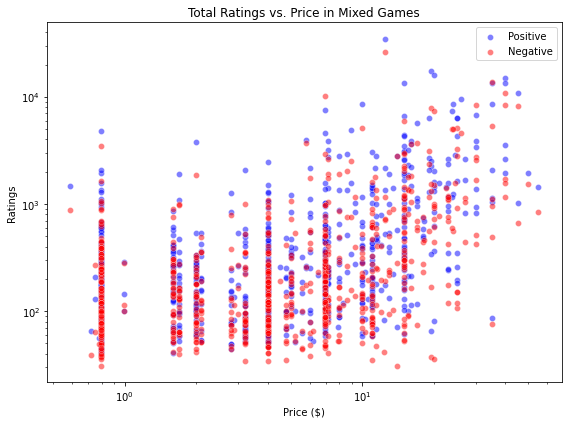

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting all three datasets on the same axes, with different colors
sns.scatterplot(x='price', y='positive_ratings', data=nonzero_mixed_game_data, alpha=0.5, ax=ax, color="blue", label="Positive")
sns.scatterplot(x='price', y='negative_ratings', data=nonzero_mixed_game_data, alpha=0.5, ax=ax, color="red", label="Negative")
# sns.scatterplot(x='price', y='total_ratings', data=nonzero_mixed_game_data, alpha=0.5, ax=ax, color="blue", label="Total")

ax.set_title('Total Ratings vs. Price in Mixed Games')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Ratings')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

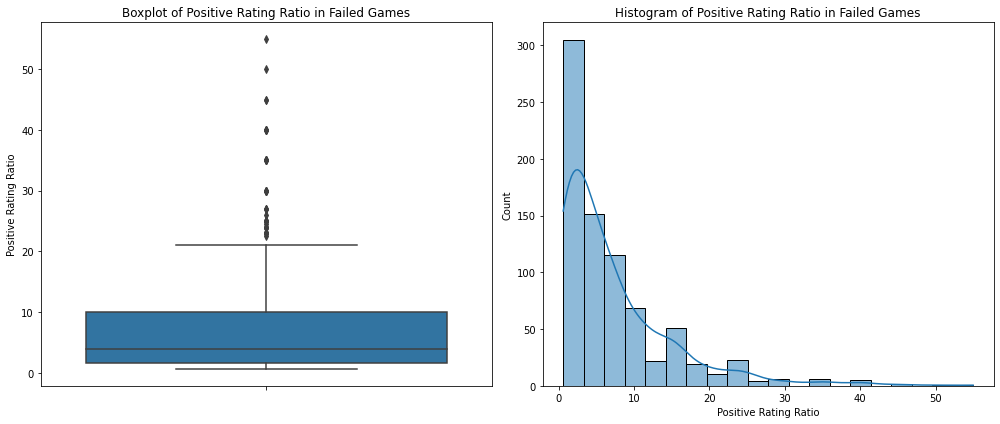

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 박스플롯
sns.boxplot(y=nonzero_mixed_game_data['price'], ax=ax[0])
ax[0].set_title('Boxplot of Positive Rating Ratio in Failed Games')
ax[0].set_ylabel('Positive Rating Ratio')

# 히스토그램
sns.histplot(nonzero_mixed_game_data['price'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Positive Rating Ratio in Failed Games')
ax[1].set_xlabel('Positive Rating Ratio')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


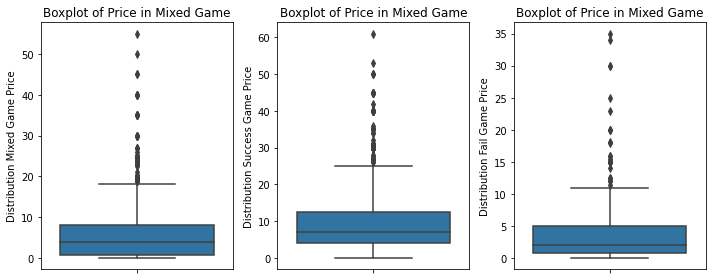

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# 박스플롯
sns.boxplot(y=mixed_game_data['price'], ax=ax[0])
ax[0].set_title('Boxplot of Price in Mixed Game')
ax[0].set_ylabel('Distribution Mixed Game Price')

sns.boxplot(y=success_game_data['price'], ax=ax[1])
ax[1].set_title('Boxplot of Price in Mixed Game')
ax[1].set_ylabel('Distribution Success Game Price')

sns.boxplot(y=fail_game_data['price'], ax=ax[2])
ax[2].set_title('Boxplot of Price in Mixed Game')
ax[2].set_ylabel('Distribution Fail Game Price')

plt.tight_layout()
plt.show()


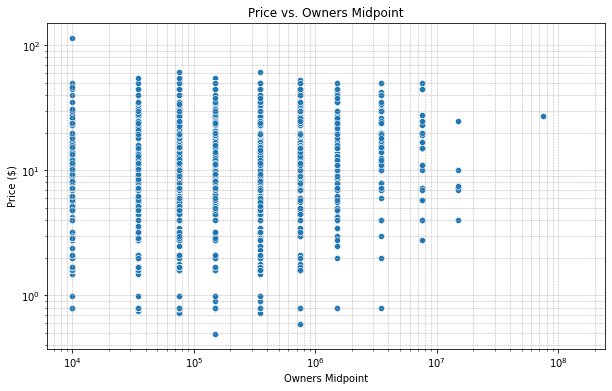

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='owners_mid', y='price', data=df)
plt.title('Price vs. Owners Midpoint')
plt.xlabel('Owners Midpoint')
plt.ylabel('Price ($)')
plt.xscale('log')  # owners_mid의 값 범위가 넓으므로 로그 스케일 사용
plt.yscale('log')  # price의 값 범위가 넓으므로 로그 스케일 사용
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

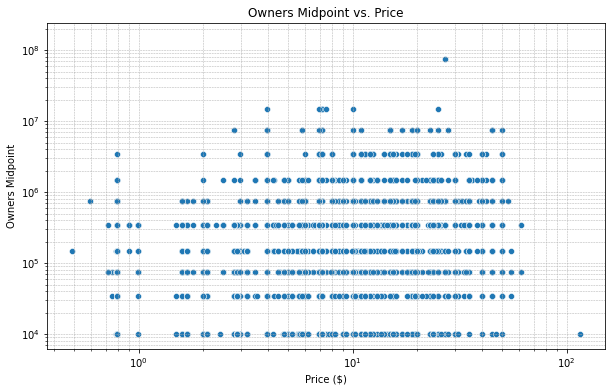

In [79]:
# x축을 price로, y축을 owners_mid로 하여 시각화

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='owners_mid', data=df)
plt.title('Owners Midpoint vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Owners Midpoint')
plt.xscale('log')  # price의 값 범위가 넓으므로 로그 스케일 사용
plt.yscale('log')  # owners_mid의 값 범위가 넓으므로 로그 스케일 사용
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()
